In [58]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [59]:
df=pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [61]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [62]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder

# Ensure all values are strings before encoding
for col in ['sex','cp','restecg','slope','thal','fbs','exang']:
    df[col] = df[col].astype(str)

# Encoding categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['cp'] = label_encoder.fit_transform(df['cp'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

# Identify columns with non-numeric data type and attempt conversion to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColumn '{col}' has object data type. Attempting conversion to numeric.")
        df[col] = pd.to_numeric(df[col], errors='coerce')


# Handling missing values (if any)
df.fillna(df.mean(), inplace=True)

# Display the first few rows after encoding
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 92.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      1      2.3      0   
1   41    1   1       135   203    0        1     132      1      0.0      1   
2   57    1  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000   
mean    53.791850    0.790749    0.777533  133.430617  201.484581    0.203744   
std      9.158031    0.406998    0.958374   20.401608  112.097949    0.403003   
min     29.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     47.750000    1.000000    0.000000  120.000000  176.750000    0.000000   
50%     54.000000    1.000000    0.000000  130.000000  224.000000    0.000000   
75%     60.000000    1.000000    2.000000  144.000000  270.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  603.000000    1.000000   

          restecg      thalch       exang     oldpeak       slope        th

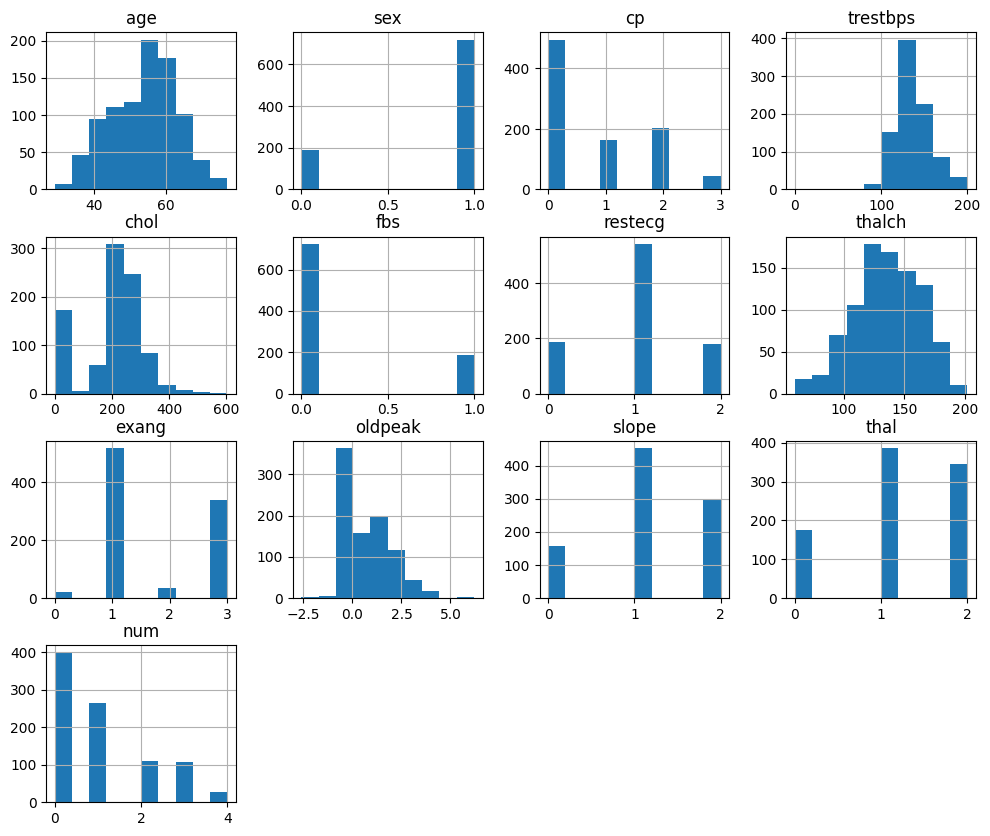

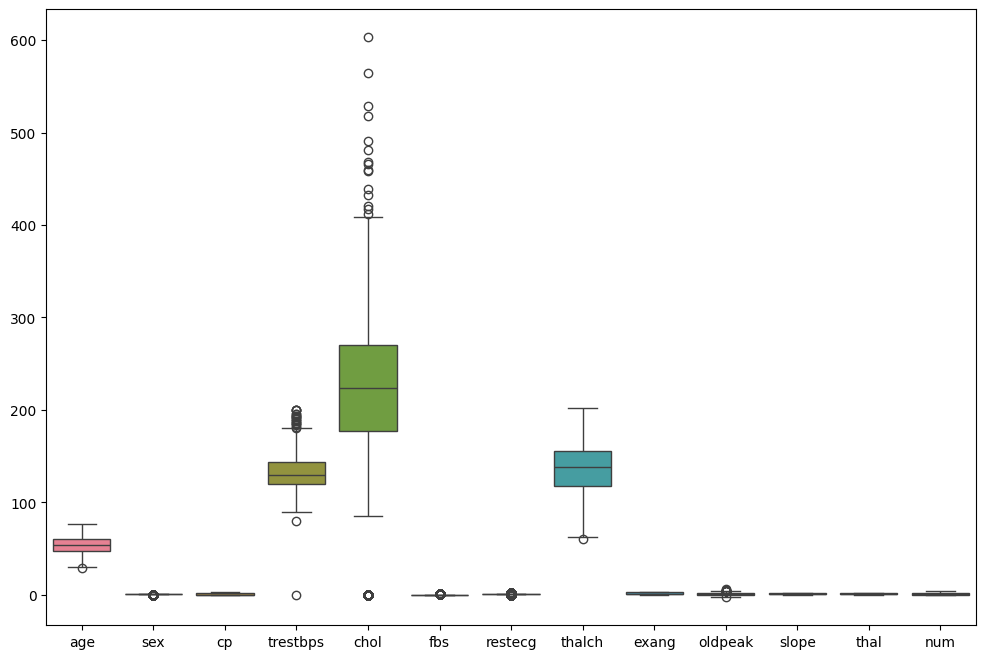

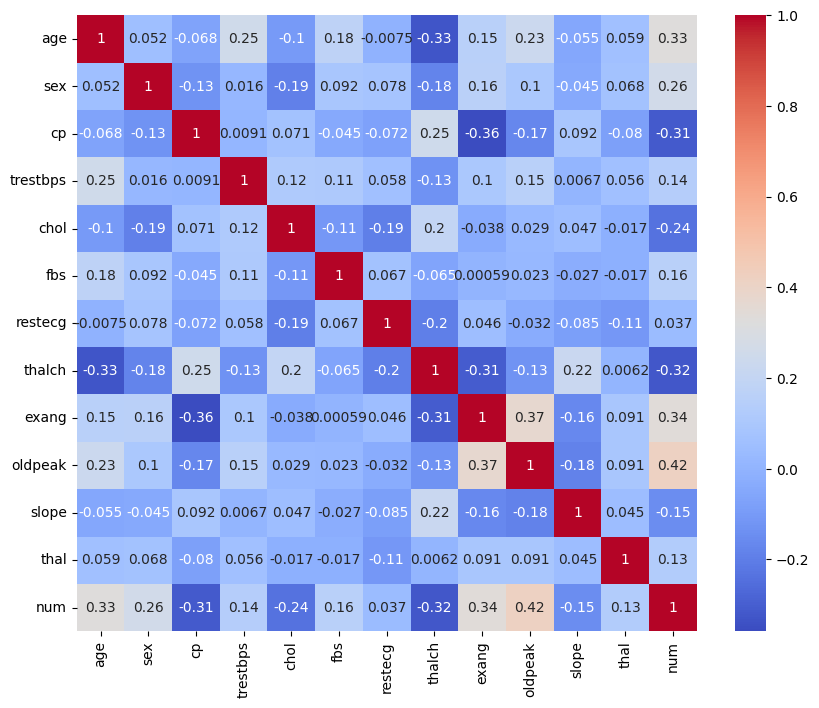

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualize the distribution of features
df.hist(figsize=(12, 10))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [66]:
unique_values = df['num'].unique()
print(unique_values)

[0 1 2 3 4]


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the dataset into features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.5439560439560439
Precision: 0.5321959405063801
Recall: 0.5439560439560439
F1-Score: 0.5379152248717466
ROC-AUC: 0.6115535228295725


In [71]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Use the best model
best_dt_classifier = grid_search.best_estimator_
y_pred_best = best_dt_classifier.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_dt_classifier.predict_proba(X_test), multi_class='ovr')

print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model Precision: {precision_best}')
print(f'Best Model Recall: {recall_best}')
print(f'Best Model F1-Score: {f1_best}')
print(f'Best Model ROC-AUC: {roc_auc_best}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}
Best Score: 0.5358148323098725
Best Model Accuracy: 0.4945054945054945
Best Model Precision: 0.46040131961875647
Best Model Recall: 0.4945054945054945
Best Model F1-Score: 0.476126331357727
Best Model ROC-AUC: 0.5830599497175493


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


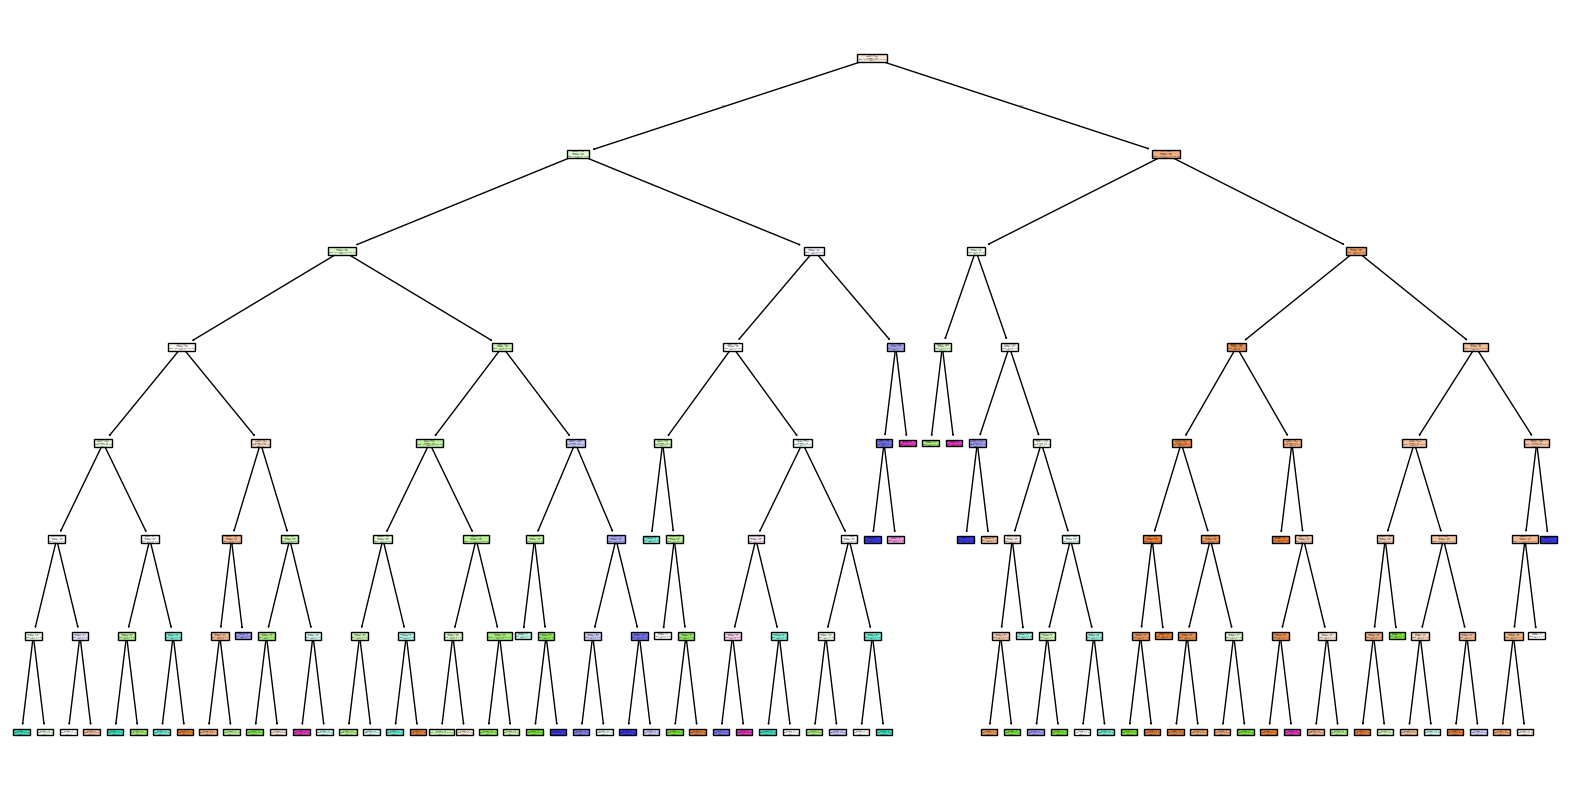

     Feature  Importance
4       chol    0.195801
2         cp    0.189709
9    oldpeak    0.151498
0        age    0.148664
7     thalch    0.106139
3   trestbps    0.058367
6    restecg    0.052594
8      exang    0.052549
10     slope    0.017386
11      thal    0.016770
1        sex    0.010523
5        fbs    0.000000


In [84]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()])
plt.show()

# Feature importance
feature_importance = best_dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

In [39]:
#Interview questions.

#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#ANS:Decision trees have several hyperparameters that can significantly impact their performance. Here are some of the most common ones:
 #a) max_depth:
#What it does: Controls the maximum depth of the tree (i.e., the number of levels in the tree).
#Effect on performance:
   #1.If set too high, the tree may overfit the training data by capturing noise.
   #2.If set too low, the tree may underfit and fail to capture important patterns in the data.
#Example: max_depth=5 limits the tree to 5 levels.

 #b) min_samples_split:
#What it does: Specifies the minimum number of samples required to split an internal node.
#Effect on performance:
   #1.A higher value prevents the tree from creating splits with very few samples, reducing overfitting.
   #2.A lower value allows the tree to create more splits, potentially capturing more complex patterns.
#Example: min_samples_split=10 means a node must have at least 10 samples to split.

  #C) min_samples_leaf:
#What it does: Specifies the minimum number of samples required to be in a leaf node.
#Effect on performance:
   #1.A higher value prevents the tree from creating leaves with very few samples, reducing overfitting.
   #2.A lower value allows the tree to create more granular leaves, potentially capturing more detail.
#Example: min_samples_leaf=5 means each leaf must have at least 5 samples.

  #d) criterion:
#What it does: Determines the function to measure the quality of a split (e.g., Gini impurity or entropy for classification, MSE for regression).
#Effect on performance:
  #1.gini: Measures the probability of misclassification (faster computation).
  #2.entropy: Measures information gain (slower but may produce better splits in some cases).
#Example: criterion='gini' uses Gini impurity for splitting.

#2. What is the difference between Label Encoding and One-Hot Encoding?
#ANS: Both Label Encoding and One-Hot Encoding are techniques used to convert categorical variables into numerical formats for machine learning models. However, they work differently and are suited for different scenarios.

 #a) Label Encoding:
#What it does: Assigns a unique integer to each category in a categorical feature.
    #Example:
    #Original Data: ['red', 'blue', 'green']
    #After Label Encoding: [0, 1, 2]
#Pros:
#Simple and efficient.
#Does not increase the dimensionality of the dataset.

#Cons:
#Introduces an ordinal relationship between categories (e.g., 0 < 1 < 2), which may not exist in the data.
#Not suitable for nominal categorical variables (e.g., colors, where there is no inherent order).
#Use Case: Suitable for ordinal categorical variables (e.g., low, medium, high).

  #b) One-Hot Encoding:
#What it does: Creates binary columns for each category in a categorical feature.
   #Example:
   #Original Data: ['red', 'blue', 'green']
   #After One-Hot Encoding:
   #red    blue   green
   #1      0      0
   #0      1      0
   #0      0      1
#Pros:
#Removes ordinal relationships between categories.
#Suitable for nominal categorical variables.

#Cons:
#Increases the dimensionality of the dataset (can lead to the "curse of dimensionality").
#May cause issues with high-cardinality categorical features (many unique categories).
#Use Case: Suitable for nominal categorical variables (e.g., colors, countries).
